In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import tree
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)

In [2]:
df1=pd.read_csv(r"./final_data.csv")
df1.head()

,Unnamed: 0,address,owners,housetype,house_condition,BHK,price,per_month_emi,total_sqft,cordinates,latitude,longitude
0,0,"Sheetal Vihar, Bhagwant Nagar, Dr.Homi Bhabha ...",Mahendra Kotwal,Apartment,old,3.0,75.00,39.72,1550.0,Sheetal Vihar,19.987960,73.787390
1,1,"Samraat Dream Citi, Samta Nagar, Nashik",Jiten Dadarkar,Apartment,old,2.0,41.00,21.71,1000.0,Samraat Dream Citi,19.982460,73.811840
2,2,"Suryaprakash Apartment,Nashik Road, Nashik",Pankaj,Apartment,old,2.0,53.35,28.25,970.0,Surya Prakash,19.975850,73.788750
3,3,"Adishvar Residency,Nashik Road, Nashik",Saurav,Apartment,old,2.0,55.00,29.13,1000.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtr...",19.930532,73.811734
4,4,"Nashik Road, Nashik",Vivek Pavanaskar,Apartment,old,2.0,27.00,14.30,853.0,"Nashik Road, Nashik, Maharashtra",19.955310,73.840890


In [3]:
df1.shape

(5496, 12)

In [4]:
df1.columns

Index(['Unnamed: 0', 'address', 'owners', 'housetype', 'house_condition',
       'BHK', 'price', 'per_month_emi', 'total_sqft', 'cordinates', 'latitude',
       'longitude'],
      dtype='object')

In [5]:
df1.groupby('housetype')['housetype'].agg('count')

housetype
Apartment            4323
Independent house    1173
Name: housetype, dtype: int64

In [6]:
df2 = df1.drop(['Unnamed: 0','address','owners','housetype','house_condition','per_month_emi','latitude','longitude'],axis='columns')
df2.head()

,BHK,price,total_sqft,cordinates
0,3.0,75.00,1550.0,Sheetal Vihar
1,2.0,41.00,1000.0,Samraat Dream Citi
2,2.0,53.35,970.0,Surya Prakash
3,2.0,55.00,1000.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtr..."
4,2.0,27.00,853.0,"Nashik Road, Nashik, Maharashtra"


In [7]:
100*(df2.isnull().sum())/len(df2)

BHK            2.965793
price         17.358079
total_sqft    27.492722
cordinates     0.000000
dtype: float64

In [8]:
df2.shape

(5496, 4)

In [9]:
df3=df2.dropna()
df3.isnull().sum()

BHK           0
price         0
total_sqft    0
cordinates    0
dtype: int64

In [10]:
df3.shape

(3879, 4)

In [11]:
df3.rename(columns = {'BHK':'bhk','cordinates':'location'},inplace =True)

C:\Users\BHUPESH P S\AppData\Local\Temp\ipykernel_9840\4283504799.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.rename(columns = {'BHK':'bhk','cordinates':'location'},inplace =True)


In [12]:
df3['bhk'].unique()

array([ 3. ,  2. ,  1. ,  4. ,  6. ,  2.5,  5. ,  7. , 10. ,  8. ])

In [13]:
df4=df3.copy()
df4=df4[df4.total_sqft.notnull()]
df4.head()

,bhk,price,total_sqft,location
0,3.0,75.00,1550.0,Sheetal Vihar
1,2.0,41.00,1000.0,Samraat Dream Citi
2,2.0,53.35,970.0,Surya Prakash
3,2.0,55.00,1000.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtr..."
4,2.0,27.00,853.0,"Nashik Road, Nashik, Maharashtra"


In [14]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price']*10000/df5['total_sqft']
df5.head()

,bhk,price,total_sqft,location,price_per_sqft
0,3.0,75.00,1550.0,Sheetal Vihar,483.870968
1,2.0,41.00,1000.0,Samraat Dream Citi,410.000000
2,2.0,53.35,970.0,Surya Prakash,550.000000
3,2.0,55.00,1000.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtr...",550.000000
4,2.0,27.00,853.0,"Nashik Road, Nashik, Maharashtra",316.529894


In [15]:
df5_stats = df5['price_per_sqft'].describe()
df5_stats

count    3879.000000
mean      379.629635
std       232.680293
min         8.000000
25%       285.714286
50%       352.000000
75%       433.333333
max      8518.518519
Name: price_per_sqft, dtype: float64

In [16]:
df5.to_csv("bhp.csv",index=False)

In [17]:
len(df5.location.unique())


595

In [18]:
df5.location = df5.location.apply(lambda x: x.strip())
location_stats = df5['location'].value_counts(ascending=False)
location_stats

Nashik Road, Nashik, Maharashtra                                264
Kala Nagar, Indira Nagar, Nashik, Maharashtra                   124
Damodar Nagar, Pathardi Phata, Nashik, Maharashtra              124
Panchavati, Nashik, Maharashtra                                  86
Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra     83
                                                               ... 
Supar Residency                                                   1
Amrut Society                                                     1
Al Amin Co-Operative Housing Society                              1
Nashik Road, Devlali, Nashik, Maharashtra, 422401                 1
Shree Kalaram Mandir                                              1
Name: location, Length: 595, dtype: int64

In [19]:
location_stats.values.sum()

3879

In [20]:
len(location_stats)

595

In [21]:
len(location_stats[location_stats>10])

79

In [22]:
len(location_stats[location_stats<=10])

516

In [23]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Bhagwant Nagar, Dr Homi Bhabha Nagar, Nashik, Maharashtra    10
DGP Nagar, Ambad, Nashik, Maharashtra                        10
Khutwad Nagar, Cidco, Nashik, Maharashtra                    10
Saptashrungi Nagar, Nashik, Maharashtra                      10
Om Nagar, Dasak, Nashik, Maharashtra                         10
                                                             ..
Supar Residency                                               1
Amrut Society                                                 1
Al Amin Co-Operative Housing Society                          1
Nashik Road, Devlali, Nashik, Maharashtra, 422401             1
Shree Kalaram Mandir                                          1
Name: location, Length: 516, dtype: int64

In [24]:
df5.location=df5.location.apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(df5.location.unique())

80

In [25]:
df5.head(10)

,bhk,price,total_sqft,location,price_per_sqft
0,3.0,75.00,1550.0,other,483.870968
1,2.0,41.00,1000.0,other,410.000000
2,2.0,53.35,970.0,other,550.000000
3,2.0,55.00,1000.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtr...",550.000000
4,2.0,27.00,853.0,"Nashik Road, Nashik, Maharashtra",316.529894
5,2.0,42.00,1050.0,other,400.000000
6,2.0,35.50,1035.0,other,342.995169
7,3.0,48.00,1375.0,other,349.090909
8,2.0,32.00,850.0,other,376.470588
9,2.0,32.00,1020.0,other,313.725490


In [26]:
df5.shape

(3879, 5)

In [27]:
df5[df5.total_sqft/df5.bhk<300]
df5.head()

,bhk,price,total_sqft,location,price_per_sqft
0,3.0,75.00,1550.0,other,483.870968
1,2.0,41.00,1000.0,other,410.000000
2,2.0,53.35,970.0,other,550.000000
3,2.0,55.00,1000.0,"Nashik Road, Vadner Dumala, Nashik, Maharashtr...",550.000000
4,2.0,27.00,853.0,"Nashik Road, Nashik, Maharashtra",316.529894


In [28]:
df5.shape

(3879, 5)

In [29]:
df6 = df5[~(df5.total_sqft/df5.bhk<300)]
df6.shape

(3825, 5)

In [30]:
df6.price_per_sqft.describe()

count    3825.000000
mean      373.346466
std       177.536494
min         8.000000
25%       285.714286
50%       351.351351
75%       430.521739
max      4361.370717
Name: price_per_sqft, dtype: float64

In [31]:
def remove_pps_outliers(df):
  df_out=pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out,reduced_df],ignore_index=True)
  return df_out

df7 = remove_pps_outliers(df6)
df7.shape

(3053, 5)

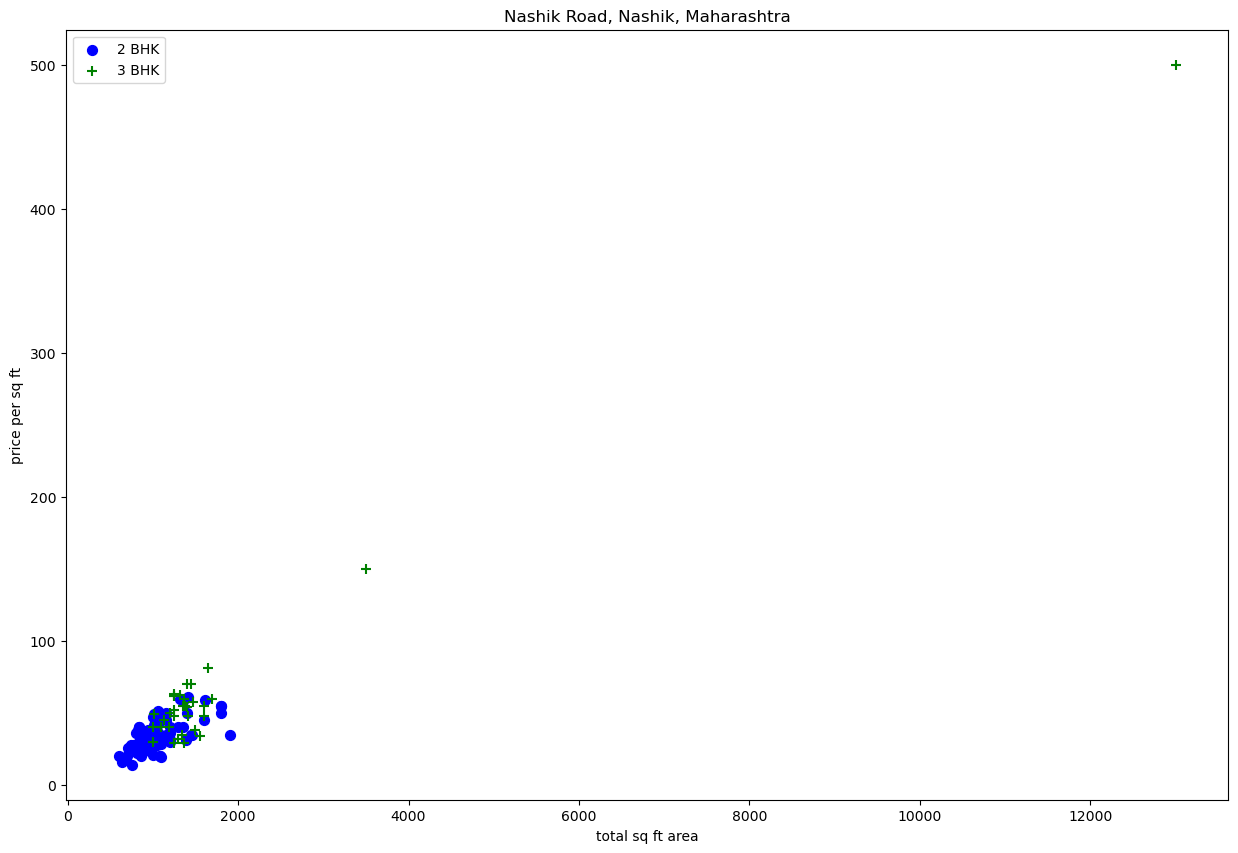

In [32]:
def plot_scatter_chart(df, location):
  bhk2 = df[(df.location==location)&(df.bhk==2.0)]
  bhk3 = df[(df.location==location)&(df.bhk==3.0)]
  matplotlib.rcParams['figure.figsize']=(15,10)
  plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK',s=50)
  plt.scatter(bhk3.total_sqft,bhk3.price,marker='+',color='green',label='3 BHK',s=50)
  plt.xlabel("total sq ft area")
  plt.ylabel("price per sq ft")
  plt.title(location)
  plt.legend()

plot_scatter_chart(df7,"Nashik Road, Nashik, Maharashtra")


In [33]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df8 = remove_bhk_outliers(df7)
# df8 = df7.copy()
df8.shape


(2429, 5)

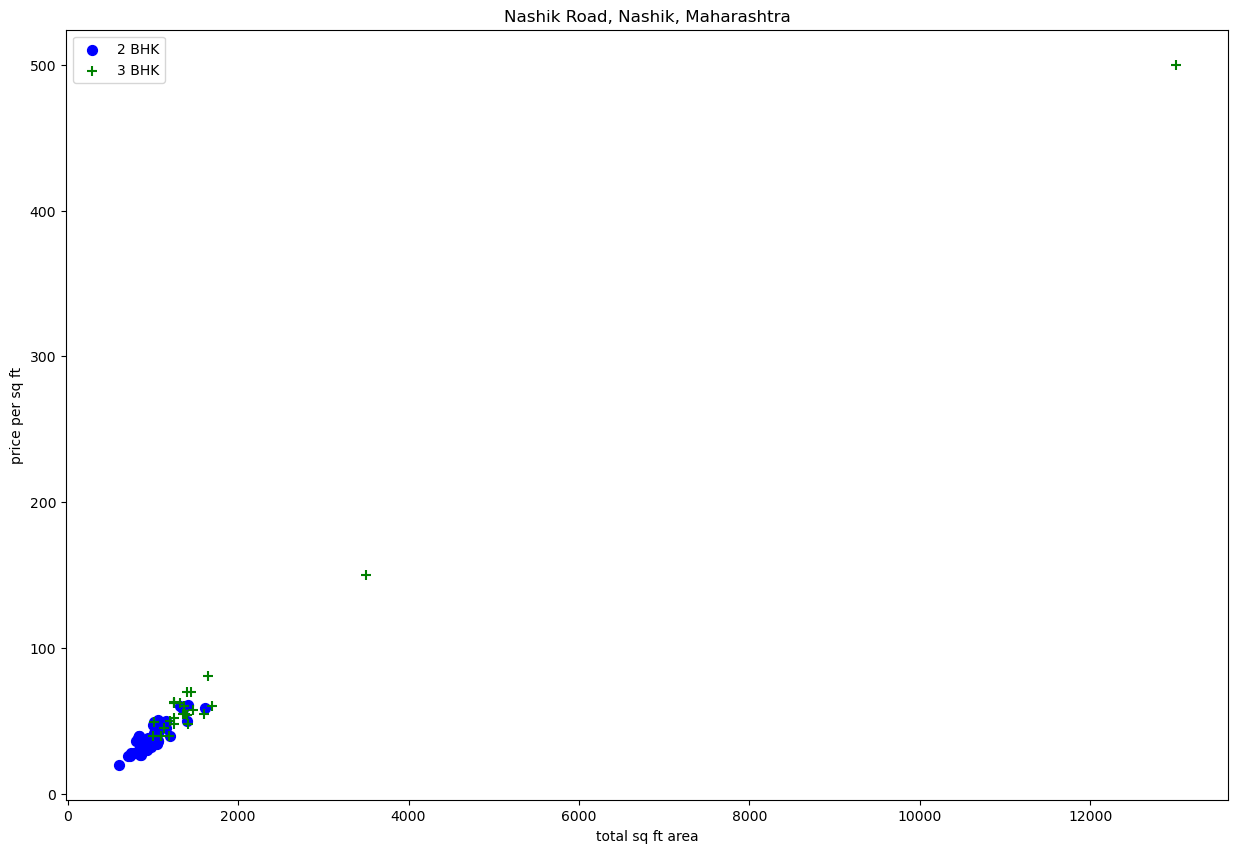

In [34]:
plot_scatter_chart(df8, "Nashik Road, Nashik, Maharashtra")

Text(0, 0.5, 'count')

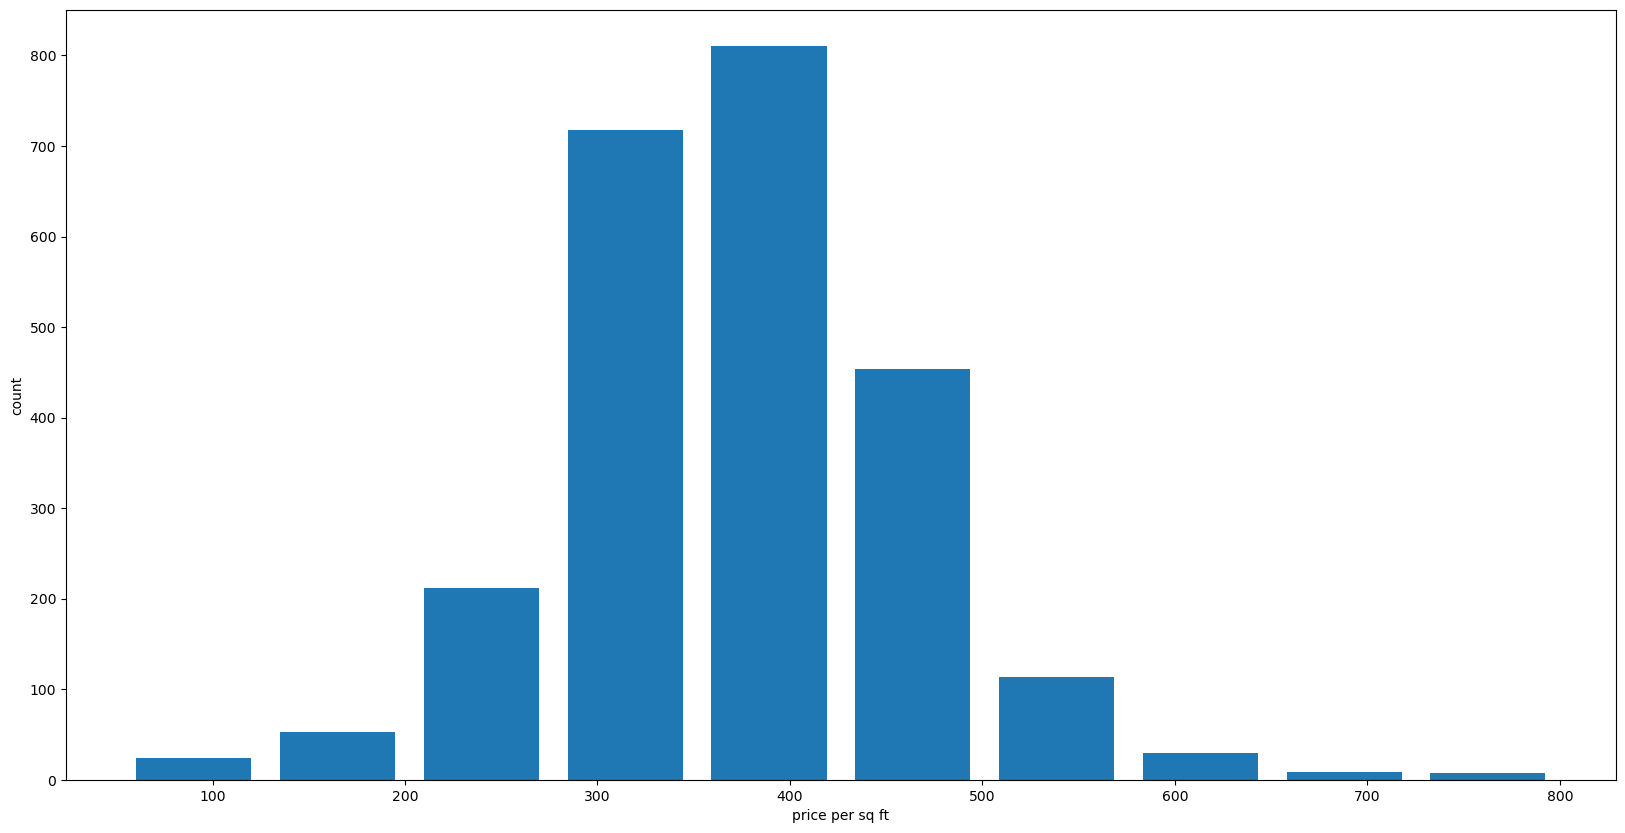

In [35]:
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
plt.hist(df8.price_per_sqft,rwidth=0.8)
plt.xlabel("price per sq ft")
plt.ylabel("count")

In [36]:
df8.head()

,bhk,price,total_sqft,location,price_per_sqft
0,2.0,34.0,1079.0,"Adgaon, Nashik, Maharashtra",315.106580
1,2.0,38.0,1116.0,"Adgaon, Nashik, Maharashtra",340.501792
2,4.0,70.0,2250.0,"Adgaon, Nashik, Maharashtra",311.111111
3,4.0,70.0,2250.0,"Adgaon, Nashik, Maharashtra",311.111111
4,1.0,18.0,600.0,"Adgaon, Nashik, Maharashtra",300.000000


In [37]:
df10 = df8.drop(['price_per_sqft'],axis='columns')
df10.head(3)


,bhk,price,total_sqft,location
0,2.0,34.0,1079.0,"Adgaon, Nashik, Maharashtra"
1,2.0,38.0,1116.0,"Adgaon, Nashik, Maharashtra"
2,4.0,70.0,2250.0,"Adgaon, Nashik, Maharashtra"


In [38]:
dummies = pd.get_dummies(df10.location)
dummies.head(3)

,"Adgaon, Nashik, Maharashtra","Adhav Nagar, Dasak, Nashik, Maharashtra","Ambad Village, Ambad, Nashik, Maharashtra","Amrutdham, Panchavati, Nashik, Maharashtra","Anand Nagar, Upnagar, Nashik, Maharashtra","Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra","Ashok Nagar, Satpur, Nashik, Maharashtra","Ashwin Nagar, Cidco, Nashik, Maharashtra","Astavinayak Colony, Veer Savarkar Nagar, Nashik, Maharashtra",Atharva Heights,...,"Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra","Trimbak, Trimbakeshwar, Nashik, Maharashtra","Uttam Nagar, Cidco, Nashik, Maharashtra","Vasantdada Nagar, Adgaon, Nashik, Maharashtra","Vijaynagar, Deola, Nashik, Maharashtra","Vivekanand Nagar, Anandvalli, Nashik, Maharashtra","Vrindavan Nagar, Cidco, Nashik, Maharashtra","Wadala, Nashik, Maharashtra","Wasan Nagar, Pathardi Phata, Nashik, Maharashtra",other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df11 = pd.concat([df10,dummies.drop('other',axis='columns')],axis='columns')
df11.head()

,bhk,price,total_sqft,location,"Adgaon, Nashik, Maharashtra","Adhav Nagar, Dasak, Nashik, Maharashtra","Ambad Village, Ambad, Nashik, Maharashtra","Amrutdham, Panchavati, Nashik, Maharashtra","Anand Nagar, Upnagar, Nashik, Maharashtra","Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra",...,"Suyog Colony, Satpur, Nashik, Maharashtra","Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra","Trimbak, Trimbakeshwar, Nashik, Maharashtra","Uttam Nagar, Cidco, Nashik, Maharashtra","Vasantdada Nagar, Adgaon, Nashik, Maharashtra","Vijaynagar, Deola, Nashik, Maharashtra","Vivekanand Nagar, Anandvalli, Nashik, Maharashtra","Vrindavan Nagar, Cidco, Nashik, Maharashtra","Wadala, Nashik, Maharashtra","Wasan Nagar, Pathardi Phata, Nashik, Maharashtra"
0,2.0,34.0,1079.0,"Adgaon, Nashik, Maharashtra",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,38.0,1116.0,"Adgaon, Nashik, Maharashtra",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,70.0,2250.0,"Adgaon, Nashik, Maharashtra",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,70.0,2250.0,"Adgaon, Nashik, Maharashtra",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,18.0,600.0,"Adgaon, Nashik, Maharashtra",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df12 = df11.drop('location',axis='columns')
df12.head(2)

,bhk,price,total_sqft,"Adgaon, Nashik, Maharashtra","Adhav Nagar, Dasak, Nashik, Maharashtra","Ambad Village, Ambad, Nashik, Maharashtra","Amrutdham, Panchavati, Nashik, Maharashtra","Anand Nagar, Upnagar, Nashik, Maharashtra","Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra","Ashok Nagar, Satpur, Nashik, Maharashtra",...,"Suyog Colony, Satpur, Nashik, Maharashtra","Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra","Trimbak, Trimbakeshwar, Nashik, Maharashtra","Uttam Nagar, Cidco, Nashik, Maharashtra","Vasantdada Nagar, Adgaon, Nashik, Maharashtra","Vijaynagar, Deola, Nashik, Maharashtra","Vivekanand Nagar, Anandvalli, Nashik, Maharashtra","Vrindavan Nagar, Cidco, Nashik, Maharashtra","Wadala, Nashik, Maharashtra","Wasan Nagar, Pathardi Phata, Nashik, Maharashtra"
0,2.0,34.0,1079.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,38.0,1116.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df12.shape


(2429, 82)

In [42]:
X = df12.drop(['price'],axis='columns')
X.head(3)

,bhk,total_sqft,"Adgaon, Nashik, Maharashtra","Adhav Nagar, Dasak, Nashik, Maharashtra","Ambad Village, Ambad, Nashik, Maharashtra","Amrutdham, Panchavati, Nashik, Maharashtra","Anand Nagar, Upnagar, Nashik, Maharashtra","Anand Vihar Colony, Veer Savarkar Nagar, Nashik, Maharashtra","Ashok Nagar, Satpur, Nashik, Maharashtra","Ashwin Nagar, Cidco, Nashik, Maharashtra",...,"Suyog Colony, Satpur, Nashik, Maharashtra","Swami Samarth Nagar, Mankar Mala, Nashik, Maharashtra","Trimbak, Trimbakeshwar, Nashik, Maharashtra","Uttam Nagar, Cidco, Nashik, Maharashtra","Vasantdada Nagar, Adgaon, Nashik, Maharashtra","Vijaynagar, Deola, Nashik, Maharashtra","Vivekanand Nagar, Anandvalli, Nashik, Maharashtra","Vrindavan Nagar, Cidco, Nashik, Maharashtra","Wadala, Nashik, Maharashtra","Wasan Nagar, Pathardi Phata, Nashik, Maharashtra"
0,2.0,1079.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1116.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.0,2250.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
X.shape

(2429, 81)

In [44]:
y = df12.price
y.head(3)

0    34.0
1    38.0
2    70.0
Name: price, dtype: float64

In [45]:
len(y)

2429

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [47]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8717680026342379

In [48]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.91729635, 0.90095133, 0.89647184, 0.83461888, 0.90025753])

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
            'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardSca

,model,best_score,best_params
0,linear_regression,0.889919,{'normalize': True}
1,lasso,0.865799,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.848051,"{'criterion': 'mse', 'splitter': 'random'}"


In [50]:
from sklearn.tree import DecisionTreeRegressor
dcs_clf = DecisionTreeRegressor()
dcs_clf.fit(X_train,y_train)
dcs_clf.score(X_test,y_test)

0.8676923580172581

In [51]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(DecisionTreeRegressor(),X,y,cv=cv)

array([0.90340641, 0.86168117, 0.90489512, 0.75012205, 0.67970632])

In [52]:
def predict_price_lr(location,sqft,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bhk
    x[1] = sqft
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [53]:
def predict_price_dcs(location,sqft,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bhk
    x[1] = sqft
    if loc_index >= 0:
        x[loc_index] = 1

    return dcs_clf.predict([x])[0]

In [54]:
predict_price_lr('Wadala, Nashik, Maharashtra',4000,2)

C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


159.45757102955295

In [55]:
predict_price_dcs('Wadala, Nashik, Maharashtra',4000,2)


C:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


150.0

In [57]:
import pickle
with open('nashik_apartment_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

In [58]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))